In [ ]:
# %matplotlib widget


import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import rispy
from glob import glob

In [2]:
ris_files = glob("./ScienceDirect/*.ris")

In [3]:
# List to store each DataFrame
dfs = []

# Process each .ris file and append to the list of DataFrames
for ris_file in ris_files:
    with open(ris_file, "r", encoding="utf-8") as file:
        entries = rispy.load(file)  # Parse .ris file using rispy
        df = pd.DataFrame(entries)  # Convert each file to a DataFrame
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
SD_papers = pd.concat(dfs, ignore_index=True)

In [4]:
SD_papers.columns

Index(['type_of_reference', 'primary_title', 'authors', 'journal_name',
       'volume', 'start_page', 'end_page', 'year', 'date', 'secondary_title',
       'issn', 'doi', 'urls', 'keywords', 'abstract', 'number'],
      dtype='object')

In [12]:
# Create a dictionary mapping SD_papers columns to WOS_papers columns
column_mapping = {
    "type_of_reference": "Publication Type",
    "primary_title": "Article Title",
    "authors": "Authors",
    "journal_name": "Source Title",
    "volume": "Volume",
    "start_page": "Start Page",
    "end_page": "End Page",
    "year": "Publication Year",
    "date": "Publication Date",
    "secondary_title": "Conference Title",  # Assuming secondary title is similar to conference title
    "issn": "ISSN",
    "doi": "DOI",
    "urls": "DOI Link",  # Assuming URLs are equivalent to DOI link
    "keywords": "Author Keywords",
    "abstract": "Abstract",
    "number": "Issue",
}

# Rename the columns in SD_papers
SD_papers = SD_papers.rename(columns=column_mapping)

# Display the updated columns
print(SD_papers.columns)
SD_papers.to_csv("./ScienceDirect/ScienceDirect.csv")

Index(['Publication Type', 'Article Title', 'Authors', 'Source Title',
       'Volume', 'Start Page', 'End Page', 'Publication Year',
       'Publication Date', 'Conference Title', 'ISSN', 'DOI', 'DOI Link',
       'Author Keywords', 'Abstract', 'Issue'],
      dtype='object')


In [10]:
keyword_counts = {}
for i, element in enumerate(SD_papers[SD_papers["Author Keywords"].notnull()]["Author Keywords"]):
    # split = element.split(";") if type(element) is str else print("FUCK FUCK", element)
    # print(split)
    for kw in element:
        kw = kw.strip().lower()
        if kw not in keyword_counts:
            keyword_counts[kw] = 1
        else:
            keyword_counts[kw] += 1

# Convert the dictionary to a DataFrame
keywords_df = pd.DataFrame(list(keyword_counts.items()), columns=["keyword", "count"])

# Sort the DataFrame by count in descending order (optional)
keywords_df = keywords_df.sort_values(by="count", ascending=False).reset_index(drop=True)

print(keywords_df)

                    keyword  count
0           mental workload     68
1                  workload     56
2             human factors     48
3            cognitive load     38
4          machine learning     35
...                     ...    ...
4070    workflow management      1
4071             edge cloud      1
4072     multi-robot system      1
4073    supersonic jet flow      1
4074  large eddy simulation      1

[4075 rows x 2 columns]


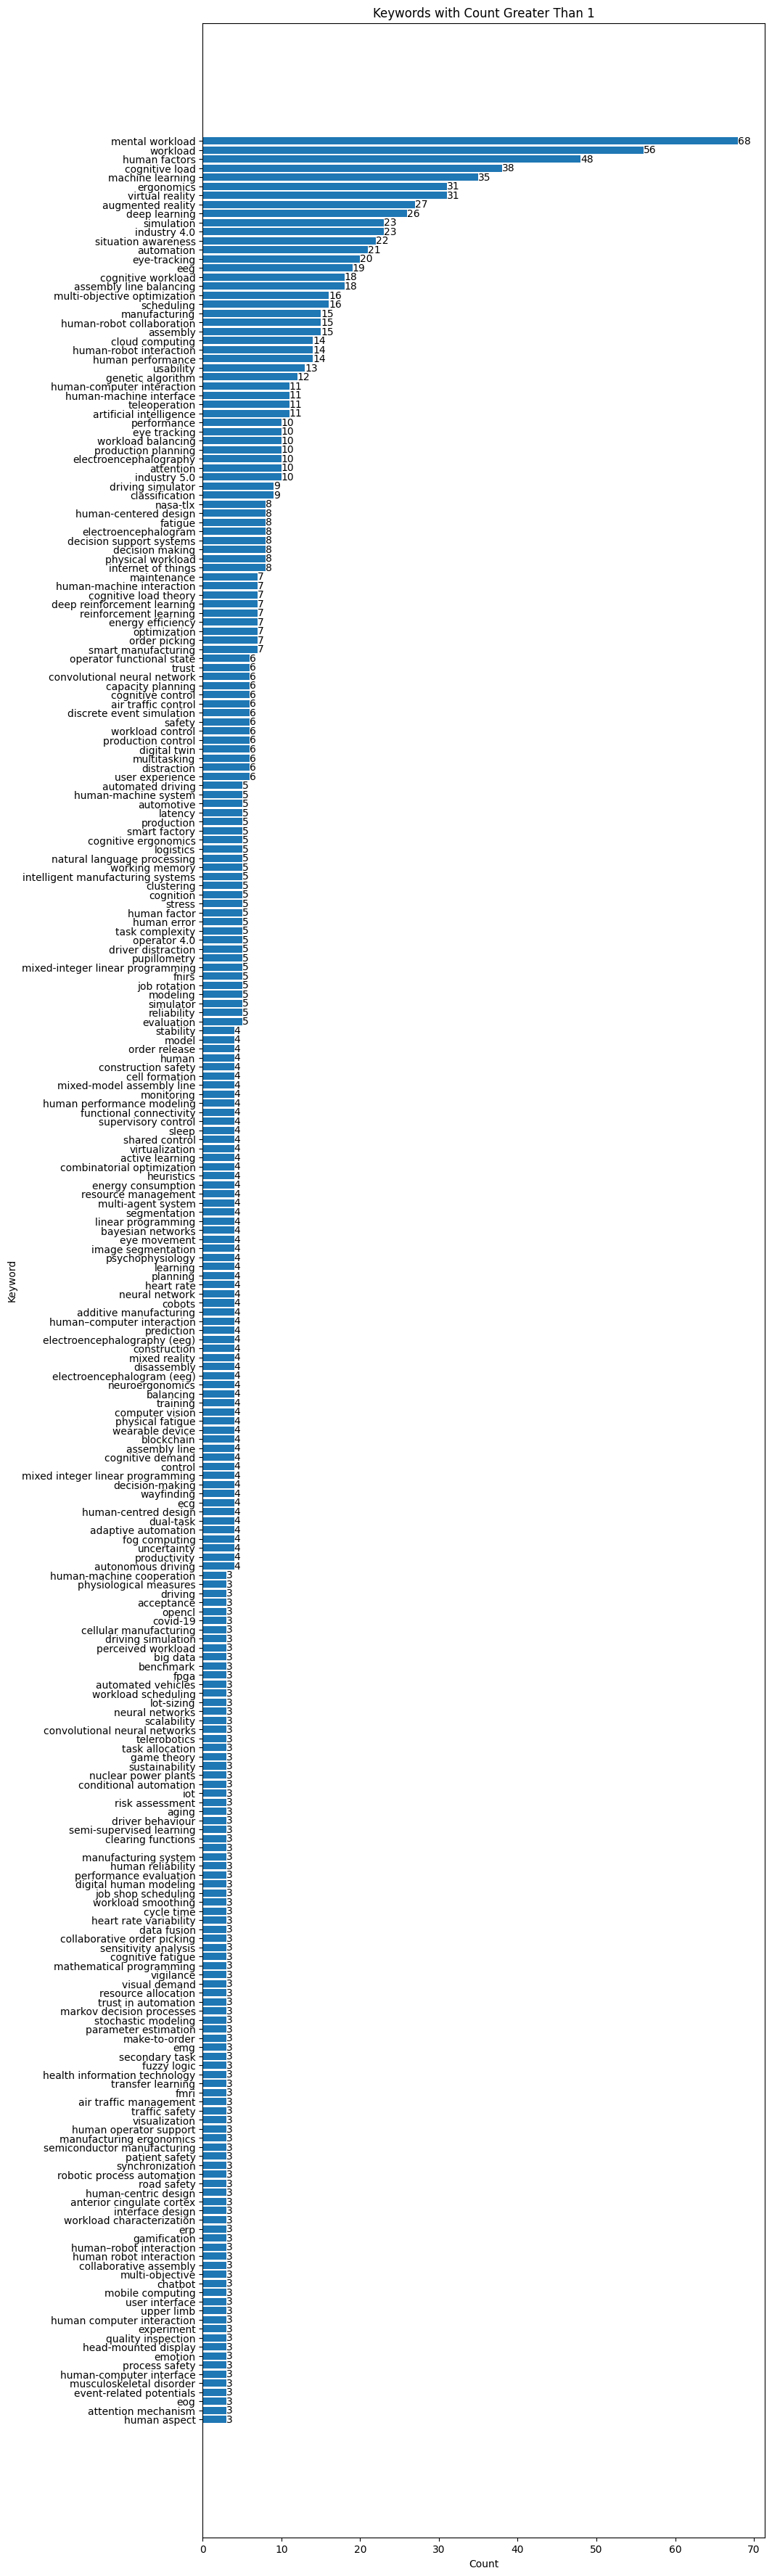

In [6]:
# Filter keywords that have a count greater than 1
keywords_df_filtered = keywords_df[keywords_df["count"] > 2]

# Plotting
plt.figure(figsize=(10, 45))
plt.barh(keywords_df_filtered["keyword"], keywords_df_filtered["count"], align="center")
plt.xlabel("Count")
plt.ylabel("Keyword")
plt.title("Keywords with Count Greater Than 1")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top

# Adding count labels at the end of each bar
for index, value in enumerate(keywords_df_filtered["count"]):
    plt.text(value, index, str(value), va="center")

plt.show()